In [2]:
import warnings
warnings.simplefilter('ignore',FutureWarning)
from pandas import *
import pandas as pd


In [3]:
# getting real data
from pandas_datareader.wb import download
YEAR =2013
gdpWB = download(indicator ='NY.GDP.PCAP.KD',country='all',start =2005,end =2008)
gdpWB
lifeEx= download(indicator ='SP.DYN.LE00.IN',country='all',start =YEAR,end =YEAR)

# getting the csv files
gdpCsv = read_csv('WB GDP 2013.csv')
lifeCsv = read_csv('WB LE 2013.csv')

# resetting the data frames index and saving it to csv fiiles.

gdpCsv = gdpWB.reset_index()
lifeCsv = lifeEx.reset_index()

# slicing the data for few countries.
gdpCountries = gdpCsv[34:]
lifeCountries = lifeCsv[34:]



# for reset the index of the real time data
life=lifeEx.reset_index()
life

gdp=gdpWB.reset_index()
gdp

# discarding few countries as its
# converting float nan to integer of life expectancy value
column1 = lifeCountries['SP.DYN.LE00.IN']
column1.dtype
column2=column1.dropna()
column3 = column2.astype(int)

column4 =gdpCountries['NY.GDP.PCAP.KD']
column5 = column4.dropna()
column6= column5.astype(int)

# defining functions.
def roundtomillions1(value):
    result = round(value/100)    
    return result

# converting US dollars to British pounds.
def UsdtoGBP (usd):
    result = usd/1.564768
    return result

def roundtomillion(result):
    result1 =round(result/100)
    return result1

lifeCountries['Life Expectancy']=column3.apply(round)
gdpCountries['GDP']= column6.apply(UsdtoGBP).apply(roundtomillion)
# gdp
selColumns = ['country','year','Life Expectancy']

selColumnsG =['country','year','GDP']

lifeCountries[selColumns].dropna()
gdpCountries[selColumnsG].dropna()

# take only GDP and Life expectancy 
gdpVsLife = merge(lifeCountries[selColumns],gdpCountries[selColumnsG],on = 'country',how='left')
gdpVsLife.dropna()
# gdpVsLife.to_excel('gdpVsLife.xlsx',encoding ='utf-8')
# to replace all the empty strings with null values nan
gdpVsLife['Life Expectancy'].replace('',pd.np.nan,inplace=True)
gdpVsLife['GDP'].replace('',pd.np.nan,inplace=True)

# to drop null values
gdpVsLife.dropna(subset=['Life Expectancy'],inplace =True)
gdpVsLife.dropna(subset=['GDP'],inplace =True)

gdpVsLife.iloc[91]

gdpVsLife.to_excel('gdpVsLife.xlsx',encoding ='utf-8')
gdpVsLife.count
gdpVsLife.columns

C:\Users\skavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\skavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['country', 'year_x', 'Life Expectancy', 'year_y', 'GDP'], dtype='object')

In [4]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife['GDP']
lifeColumn = gdpVsLife['Life Expectancy']
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
	print('It is statistically significant.')
else:
        print('It is not statistically significant.')

The correlation is 0.829963022667169
It is statistically significant.


In [5]:
# calculate the correlation between GDP and population.
popDF=read_csv('WHO POP TB all.csv')
headings = ['Country','Population (1000s)']
popDF[headings]

# changing the column names:
new_columns = gdpVsLife.columns.values
new_columns[0] = 'Country'
gdpVsLife.columns =new_columns

headings1=['Country','GDP']
gdpVsLife[headings1]
popDfVsGdp = merge(popDF[headings],gdpVsLife[headings1],on ='Country', how = 'left')
popDfVsGdp

# replace the empty strings with nan
popDfVsGdp['GDP'].replace('',pd.np.nan,inplace =True)
popDfVsGdp['Population (1000s)'].replace('',pd.np.nan,inplace =True)


# drop the nan values.
popDfVsGdp.dropna(subset =['GDP'],inplace =True)
popDfVsGdp.dropna(subset =['Population (1000s)'],inplace =True)
popDfVsGdp






,Country,Population (1000s),GDP
0,Afghanistan,30552,3.0
1,Afghanistan,30552,3.0
2,Afghanistan,30552,3.0
3,Afghanistan,30552,2.0
4,Albania,3173,24.0
5,Albania,3173,23.0
6,Albania,3173,22.0
7,Albania,3173,20.0
8,Algeria,39208,28.0
9,Algeria,39208,28.0


In [6]:
# spearman correlation:
from scipy.stats import spearmanr

gdpColumn = popDfVsGdp['GDP']
popColumn = popDfVsGdp['Population (1000s)']
(correlation, pValue) = spearmanr(gdpColumn, popColumn)
print('The correlation is', correlation)
if pValue < 0.05:
	print('It is statistically significant.')
else:
        print('It is not statistically significant.')

The correlation is -0.1715517938837616
It is statistically significant.


In [7]:
# coefficient zero

table =[ [-2,4] ,[-1,1],[0,0],[1,1],[2,4]]

sqDF = DataFrame(columns=['x','y'],data=table)
sqDF
(correlation,pvalue)= spearmanr(sqDF['x'],sqDF['y'])
print ("the correlation is", correlation)
'''
The coeficient of zero states that there is no ranking
relationship between the indicators.but there might
be some other relationship.

'''


the correlation is 0.0


'\nThe coeficient of zero states that there is no ranking\nrelationship between the indicators.but there might\nbe some other relationship.\n\n'

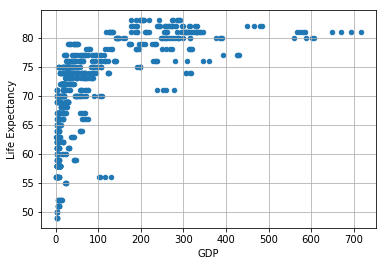

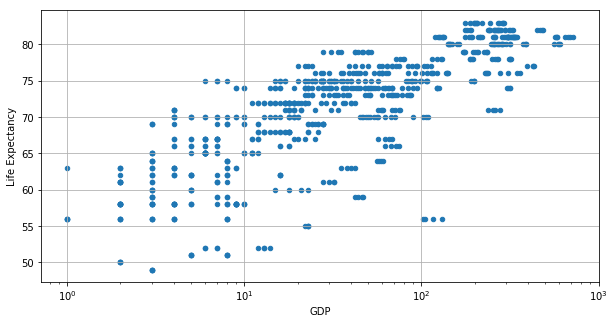

In [8]:
%matplotlib inline
gdpVsLife.plot(x='GDP',y='Life Expectancy',kind ='scatter',grid=True)
gdpVsLife.plot(x='GDP',y='Life Expectancy',kind ='scatter',logx=True,grid=True,figsize=(10,5))
